## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL

from mpl_toolkits.axes_grid1 import make_axes_locatable
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
from math import sqrt

In [32]:
# READING THE CSV FILE
df_bikes = pd.read_csv('bike-share.csv')

# CHNAGING THE INDEX TO START FROM 1
df_bikes.index += 1;

# STUDYING THE DATA
df_bikes.head()  

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
#DATA PREPROCESSING 

df_bikes = df_bikes.drop(['instant','dteday','holiday'],axis=1);


df_bikes.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'temp' : 'actual_temp',
                     'atemp' : 'feelslike_temp',  
                     'hum': 'humidity',
                     'cnt':'count','yr':'year'},inplace=True);


df_bikes['season'] = df_bikes.season.astype('category')
df_bikes['month'] = df_bikes.month.astype('category')
df_bikes['weekday'] = df_bikes.weekday.astype('category')
df_bikes['workingday'] = df_bikes.workingday.astype('category')
df_bikes['weather'] = df_bikes.weather.astype('category')
df_bikes['year'] = df_bikes.year.astype('category')


df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 1 to 731
Data columns (total 13 columns):
season            731 non-null category
year              731 non-null category
month             731 non-null category
weekday           731 non-null category
workingday        731 non-null category
weather           731 non-null category
actual_temp       731 non-null float64
feelslike_temp    731 non-null float64
humidity          731 non-null float64
windspeed         731 non-null float64
casual            731 non-null int64
registered        731 non-null int64
count             731 non-null int64
dtypes: category(6), float64(4), int64(3)
memory usage: 45.6 KB


In [34]:
#CHECKING FOR MISSING VALUES
df_bikes.isna().any()

season            False
year              False
month             False
weekday           False
workingday        False
weather           False
actual_temp       False
feelslike_temp    False
humidity          False
windspeed         False
casual            False
registered        False
count             False
dtype: bool

## EXPLORATORY DATA ANALYSIS

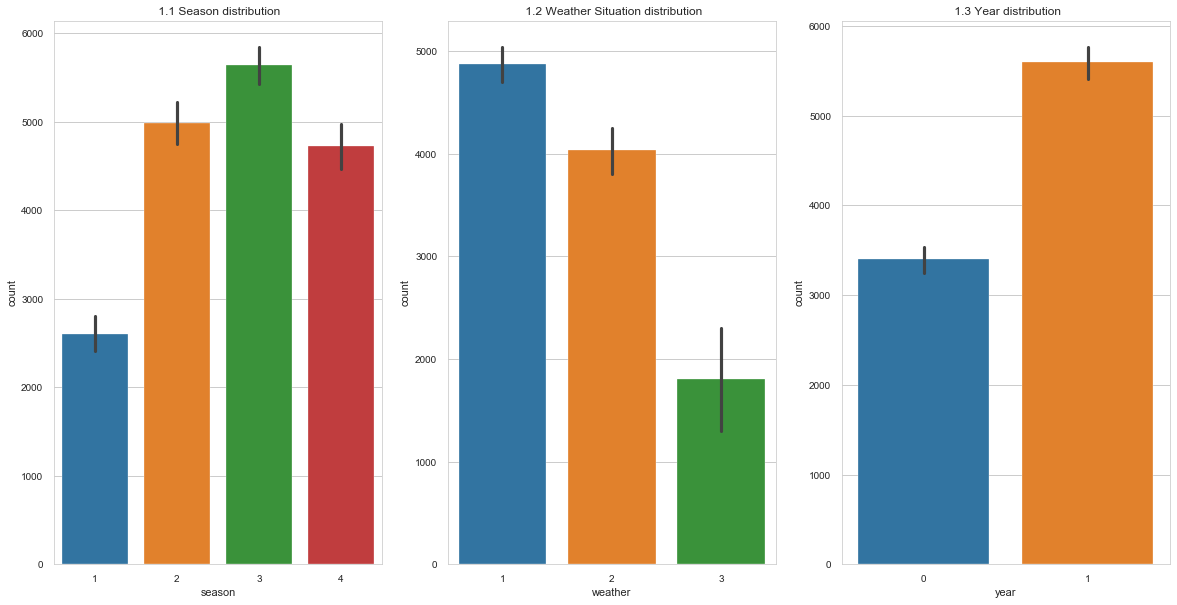

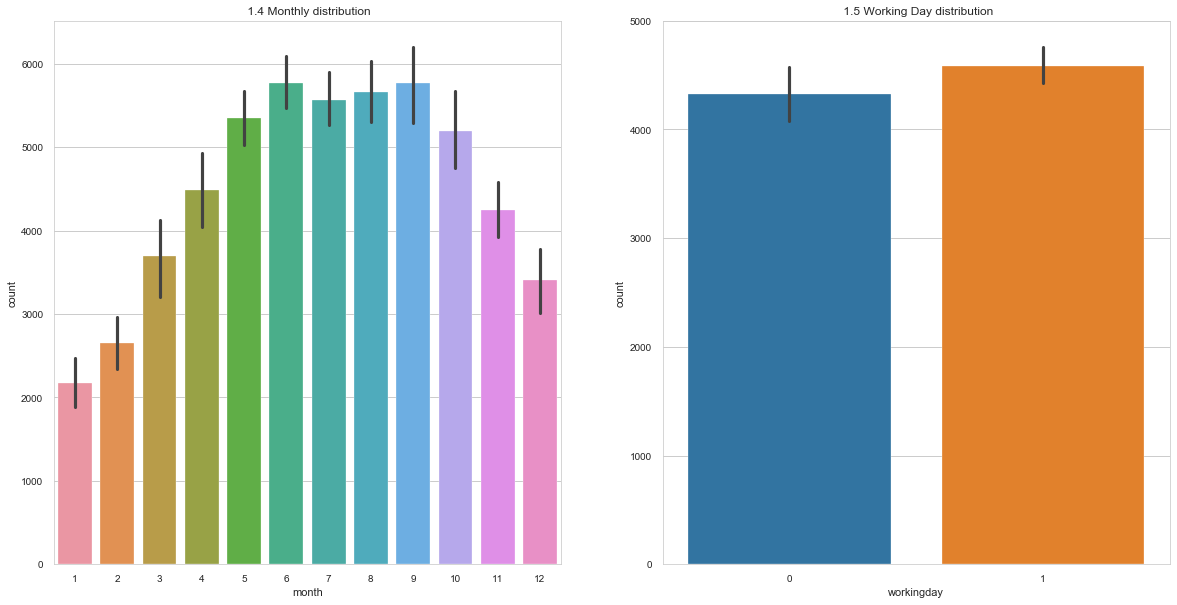

In [35]:
# 1. Distribution for Categorical Data
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,10))
ax1.set(title=" 1.1 Season distribution")
sns.barplot(x='season', y='count',data = df_bikes,ax=ax1)
            
ax2.set(title=" 1.2 Weather Situation distribution")
sns.barplot(x='weather', y='count',data = df_bikes,ax=ax2)

ax3.set(title=" 1.3 Year distribution")
sns.barplot(x='year', y='count',data = df_bikes,ax=ax3)


fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax1.set(title=" 1.4 Monthly distribution")
sns.barplot(x='month', y='count',data = df_bikes,ax=ax1)

ax2.set(title=" 1.5 Working Day distribution")
sns.barplot(x='workingday', y='count',data = df_bikes,ax=ax2)

In [36]:
#2.SUMMARY STATISTICS
df_bikes.describe(exclude = np.number)

,season,year,month,weekday,workingday,weather
count,731,731,731,731,731,731
unique,4,2,12,7,2,3
top,3,1,12,6,1,1
freq,188,366,62,105,500,463


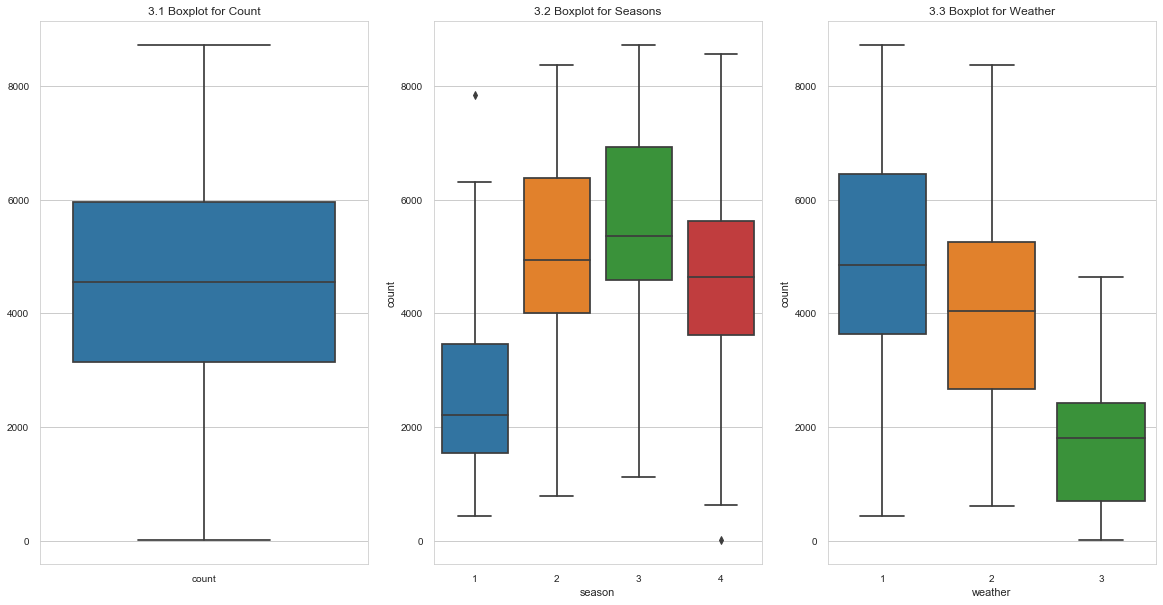

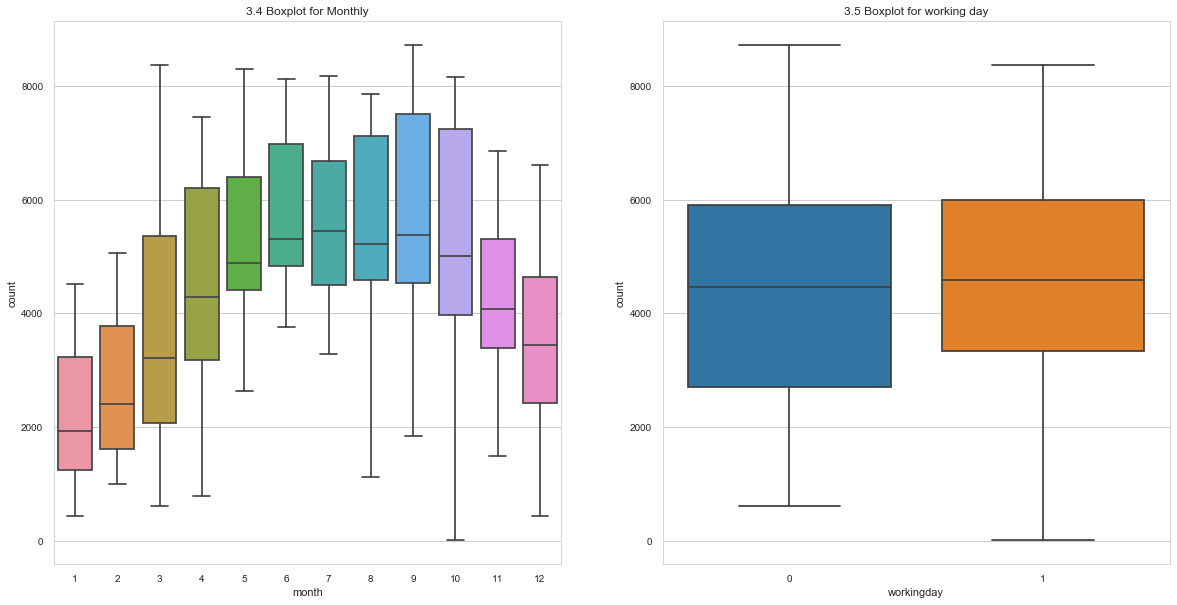

In [37]:
# 3.BOXPLOT 
# TO CHECK FOR OUTLIERS
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,10))
sns.boxplot(data=df_bikes[['count']], ax=ax1)
ax1.set(title="3.1 Boxplot for Count")
sns.boxplot(x=df_bikes['season'],y=df_bikes['count'], ax=ax2)
ax2.set(title="3.2 Boxplot for Seasons")
sns.boxplot(x=df_bikes['weather'],y=df_bikes['count'], ax=ax3)
ax3.set(title="3.3 Boxplot for Weather")


fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.set(title="3.4 Boxplot for Monthly")
sns.boxplot(x=df_bikes['month'],y=df_bikes['count'], ax=ax1)
ax2.set(title="3.5 Boxplot for working day")
sns.boxplot(x=df_bikes['workingday'],y=df_bikes['count'], ax=ax2)

In [38]:
# 4.SUMMARY STATISTICS for Continuous Variable 
df_bikes_numeric = df_bikes.describe()
df_bikes_numeric

,actual_temp,feelslike_temp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


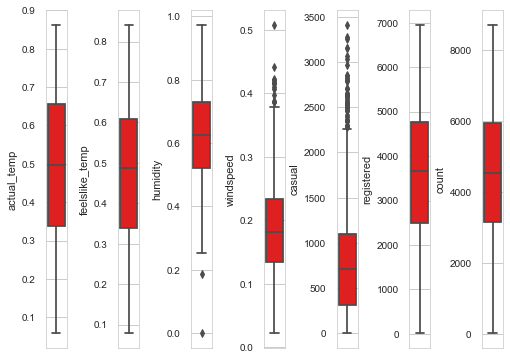

In [39]:
# 5. BOXPLOT FOR EACH NUMERIC DATA TO IDENTIFY THE OUTLIERS
l = df_bikes_numeric.columns.values
number_of_columns=7
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_bikes[l[i]],color='red',orient='v')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


#2.1 EXPLORATARY DATA ANALYSIS FOR CATEGORICAL DATA:


Fig 1:(1.1, 1.2, 1.3, 1.4, 1.5) shows the distribution of the 'count',that is,number of users using the bikes. It is clearly observed that the most number of bikes are rented during Fall, months being June, July, August and September. Also it is observed that people prefer riding the bikes during the clear weather situations. The count for the number of bikes has shown a significant growth in 2012 as compared to 2011 and it is safe to assume that it will show an upward trend in the coming years. Also interesting information is that the more number of bikes are rented on the working day in comparrison to weekends/holidays.


Fig 3:(3.1,3.2,3.3,3.4,3.5) show boxplots for all the categorical data. Boxplots are drawn to check for any outliers. Machine Learning algorithms are sensitive to this and can lead to wrong results.


#2.2 EXPLORATARY DATA ANALYSIS FOR CONTINUOUS DATA:


The describe function gives us the statistical summary for the continuous data, for the 'casual'and 'windspeed' feature a large difference is observed between the third quartile and the maximum value. Thus, indicating potentila outliers.The boxplot ploted for these features indicate the same.

## DATA ANALYSIS

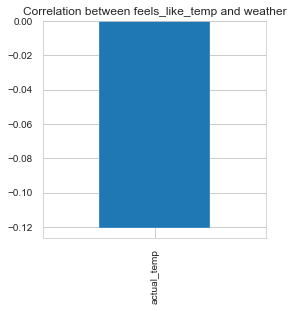

In [40]:
#CORRELATION BETWEEN OUTSIDE TEMP AND THE WEATHER
correlation=df_bikes[['actual_temp']].corrwith(df_bikes['weather'])
correlation.plot.bar(figsize=(4,4), title='Correlation between feels_like_temp and weather', 
              grid=True, legend=None, style=None, fontsize=None, colormap=None, label=None)

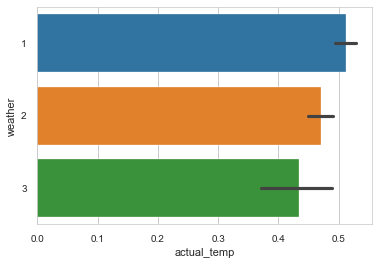

In [41]:
# PLOTING THE ABOVE CORRERELATION 
sns.barplot(x=df_bikes['actual_temp'], y=df_bikes['weather'])

[Text(0.5, 1.0, '1. Relation between no. of bikes rented on a given day with respect to weather situation ')]

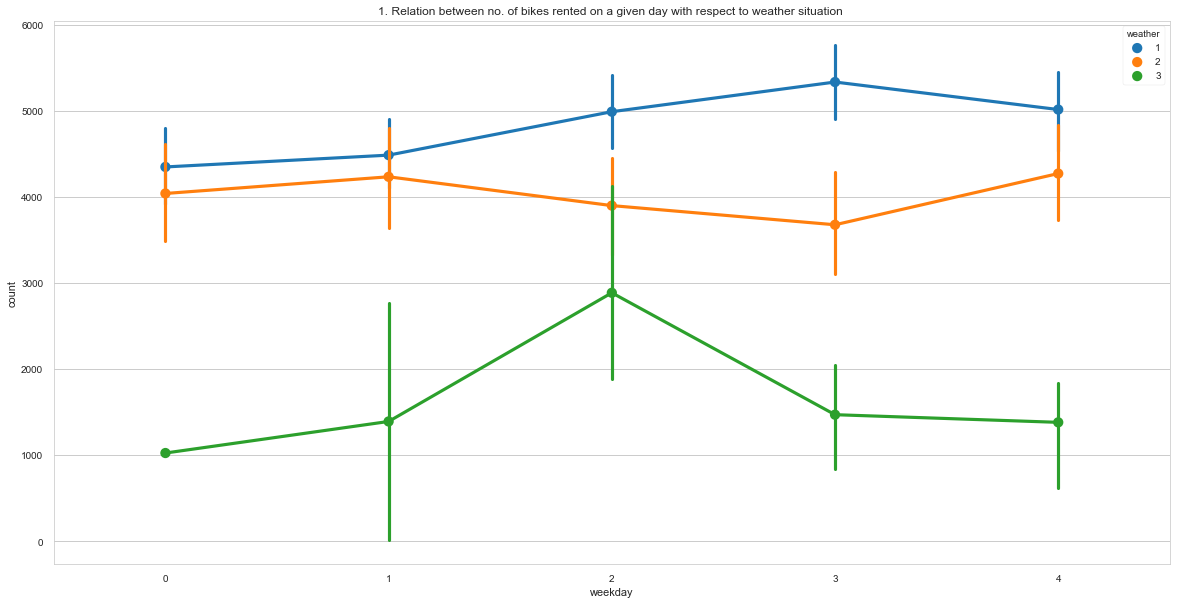

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(x ='weekday', y='count', hue = 'weather',data = df_bikes,order = [0,1,2,3,4])
ax.set(title="1. Relation between no. of bikes rented on a given day with respect to weather situation ")

#3.1 In order to show relationship between weather and the outside temperature a correlation function was plotted using a bargraph. From the graph it is observed that they both are neagtively correlated,that is , the actual temperature is high in weater situation 1 and falls on other weather situations respectively. In order to show the relationship between the weather situation and number of bikes on a given day, a point plot(line plot for categorical vairables in seaborn) is used where each color line shows the three weather situation , it is observed that when the weather situation is clear , the number of bikes rented are more. A point plot represents an estimate of centeral dependencies forvariable by the position of scatter plot points and also provide some indicators of the uncertainity around the estimate using error bars.


Other options considered was scatter plots, which are appropriate for modelling.Scatter plots would be appropriate, but in the end it's much easier to visualise the trend in the dataset by using lines instead of isolated data points.

[Text(0.5, 1.0, '3. Use of the system during weekdays and weekends/holidays')]

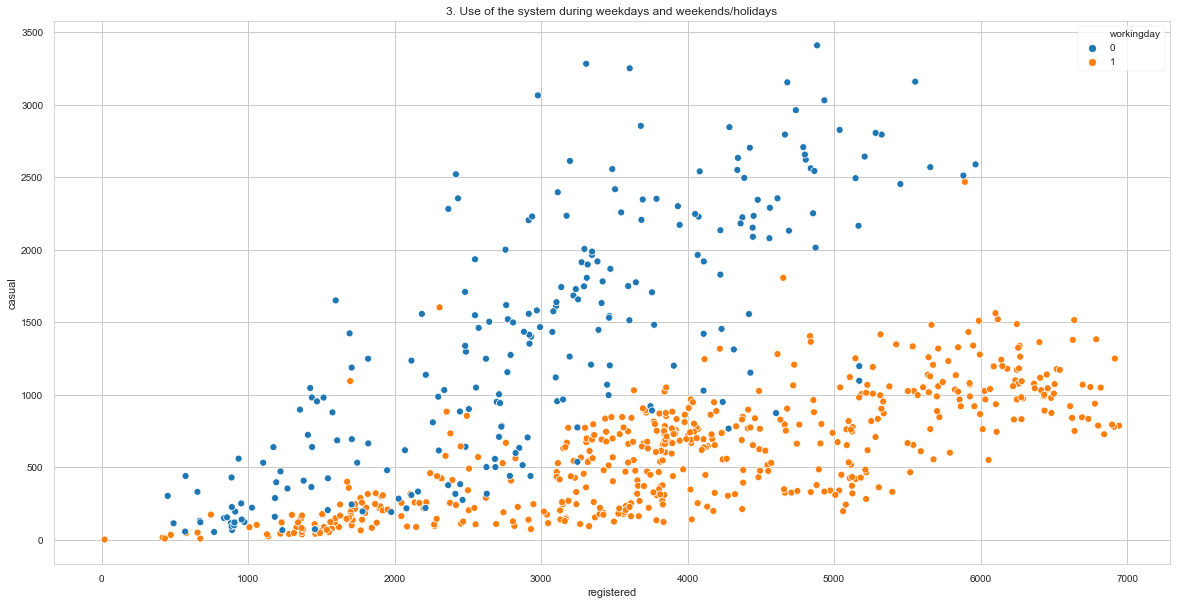

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x='registered', y='casual',
            hue='workingday',data = df_bikes)
ax.set(title="3. Use of the system during weekdays and weekends/holidays")

#3.3 In order to observe how the casual and registered users vary with repect to each other during holidays and workdays, a scatter plot is used where the yellow dots represents the working day while the blue scatter represent the non-working day/holiday. From the graph above it is observed that the registered users are more during the working days while the casual users rent bike during the holidays/weekends.


Other option for this graph was apointplot(as used above).However, a scatter plot is much readable for the user to understand the relationship between the two value sets.

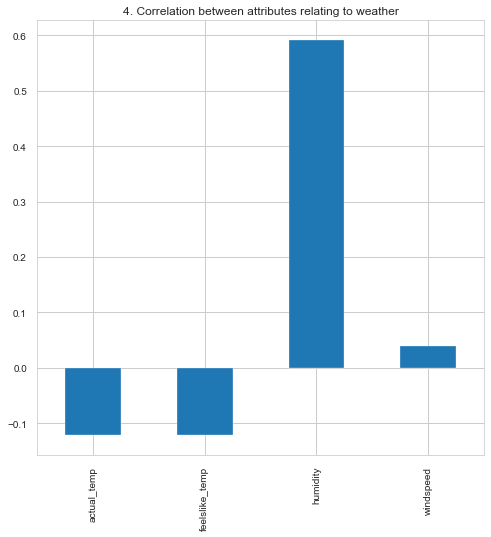

In [17]:
# Finding Correlations between attributes related to weather
correlation=df_bikes[['actual_temp','feelslike_temp',
                      'humidity','windspeed']].corrwith(df_bikes['weather'])

correlation.plot.bar(figsize=(8,8), title='4. Correlation between attributes relating to weather', 
              grid=True, legend=None, style=None,
              fontsize=None, colormap=None, label=None)

#3.4 To draw a relationship among different attributes relating to weather the correlation among all of them is plotted using a bar plot. The above graph tells us the following : 'actual_temp' and 'feelslike_temp' are negatively correlated with respect to weather situation and 'humidity' and 'windspeed' are positively correlated to the weather situation.

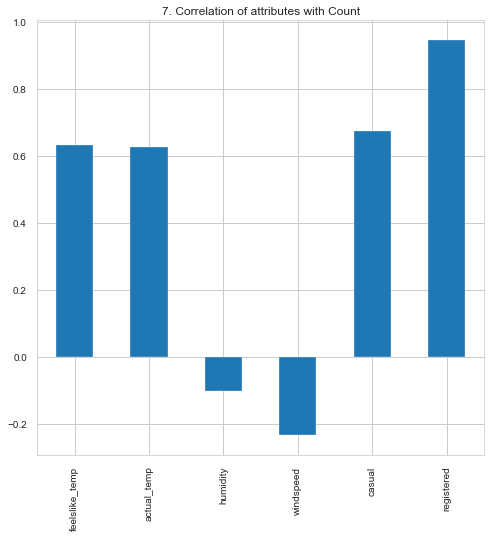

In [18]:
corr = df_bikes[['feelslike_temp','actual_temp','humidity','windspeed',
             'casual','registered',]].corrwith(df_bikes['count'])
corr.plot.bar(figsize=(8,8), title='7. Correlation of attributes with Count', 
             grid=True, legend=None, style=None,
            fontsize=None, colormap=None, label=None)

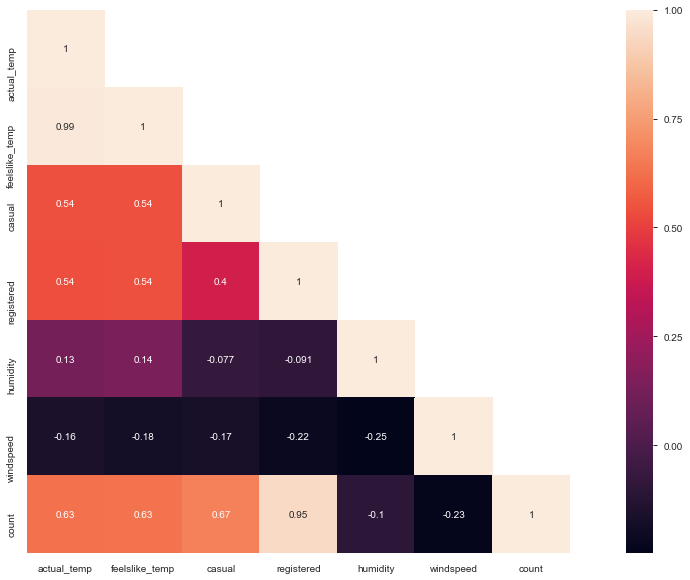

In [19]:
data_correlation = df_bikes[['actual_temp', 'feelslike_temp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sns.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

In [21]:
df_bikes = df_bikes.drop(['feelslike_temp'],axis=1);
df_bikes.info()

KeyError: "['feelslike_temp'] not found in axis"

#3.5 Understanding demand for bike services is imporatnat for environmental reasons. We tried understanding the realtionship between different features affecting the number of users using this service depending on the type of day,which day, month, season and weather situation.

This help us in knowing when the demand of the bike will be high and also the time period that can be used in maintaince of the bikes when it is not in use

The following are some intersting facts about the data, which is not shown directly : 
It is observed that not a single user had rented a bike during the extreme(4th) weather situaion.For the above correlation between features and count it is observed that 'actual_temp' and 'feelslike_temp' are positively correlated and equal thus we can drop 'feelslike_temp'. Also in the dataset, 'casual' and 'registered' variables can be misleading. For example: In order to predict the number of users for future, variables like 'season,month weather,weekday' have an effect on 'count'but using 'casual' and 'registered' variables would not have any effect because that is ehat we are triyng to predict since 'count' is a decomposition of both.  

## A linear Regression Model to predict the growth of their company in the coming years.

In [23]:
#One hot Encoding 
df_dummy = df_bikes

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column],prefix=column)],axis=1) #drop_first=True
    #df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'weekday', 'workingday', 'weather','year']
for column in columns_to_dummify:
    df_dummy = dummify_dataset(df_dummy, column)
    
df_dummy.head(5)

,season,year,month,weekday,workingday,weather,actual_temp,humidity,windspeed,casual,...,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weather_1,weather_2,weather_3,year_0,year_1
1,1,0,1,6,0,2,0.344167,0.805833,0.160446,331,...,0,0,1,1,0,0,1,0,1,0
2,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,...,0,0,0,1,0,0,1,0,1,0
3,1,0,1,1,1,1,0.196364,0.437273,0.248309,120,...,0,0,0,0,1,1,0,0,1,0
4,1,0,1,2,1,1,0.200000,0.590435,0.160296,108,...,0,0,0,0,1,1,0,0,1,0
5,1,0,1,3,1,1,0.226957,0.436957,0.186900,82,...,0,0,0,0,1,1,0,0,1,0


The r square value is : 0.7104408698391074


Text(0, 0.5, 'Predicted Count')

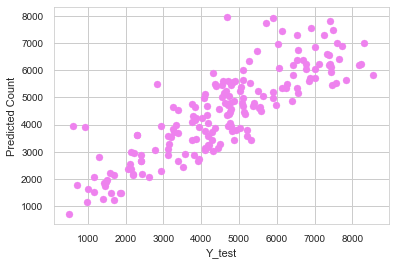

In [26]:
# Identifying the features and target
features = df_dummy[['actual_temp','humidity',
                     'windspeed','year_0']]
target = df_dummy[['count']]
X= features.values
Y= target.values
#Linear Regression  
lm= LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,random_state =21)
lm.fit(X_train,Y_train)
prediction = lm.predict(X_test)
R2 = lm.score(X_test,Y_test)    
print ('The r square value is :', R2 )
plt.scatter(Y_test,prediction,c = 'violet')
plt.xlabel('Y_test')
plt.ylabel('Predicted Count')




One Hot Encoding Since we have categorical values in our data set, we need our algorithm to have equal weight for all clasess to perform linear regression. For instance: our months are represented by numbers from 1 to 12. But we can’t really say that a 12 is better than a 11 here. A way to change this perspective is using the one hot encoding technique. This is a process by which we convert categorical variables into binary categories.


Here the linear regression model is built to predict the number of bikes rented daily based in environmental and weather features. In the model we use all features excluding 'month' since we are predicting on daily basis and 'casual' and 'registered' users since they are a combined to give the target variable,that is,'count'. In order to show the accuracy of the model a scatter graph is plotted and r-squared value is calculated. The graph here shows that majority of the scatter forms a straight line while r-square valye is also close to the ideal value of 1.